In [5]:
# Importing modules
import pandas as pd

# Read data into data
data = pd.read_csv('./NewsArticles.csv', encoding="ISO-8859-1")

# Print head
data.head(3)

,article_id,publish_date,article_source_link,title,subtitle,text,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143
0,1,2017/2/7,http://abcnews.go.com/Politics/pence-break-tie...,"Betsy DeVos Confirmed as Education Secretary, ...",NaN,Michigan billionaire education activist Betsy ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2017/2/7,http://abcnews.go.com/Politics/wireStory/melan...,Melania Trump Says White House Could Mean Mill...,NaN,First lady Melania Trump has said little about...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2017/2/7,http://abcnews.go.com/Politics/wireStory/trump...,"As Trump Fears Fraud, GOP Eliminates Election ...",NaN,A House committee voted on Tuesday to eliminat...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Remove the columns
articles = data[['title', 'text']]
articles.dropna(axis=0, how='any', inplace=True)

# Print out the first rows of articles
articles.head(3)

/opt/anaconda3/envs/env-TM2020/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,title,text
0,"Betsy DeVos Confirmed as Education Secretary, ...",Michigan billionaire education activist Betsy ...
1,Melania Trump Says White House Could Mean Mill...,First lady Melania Trump has said little about...
2,"As Trump Fears Fraud, GOP Eliminates Election ...",A House committee voted on Tuesday to eliminat...


In [7]:
# Load the regular expression library
import re

# Remove punctuation
articles['text_processed'] = \
articles['text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
articles['text_processed'] = \
articles['text_processed'].map(lambda x: x.lower())

# Print out the first rows of articles
articles['text_processed'].head(3)

/opt/anaconda3/envs/env-TM2020/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/env-TM2020/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0    michigan billionaire education activist betsy ...
1    first lady melania trump has said little about...
2    a house committee voted on tuesday to eliminat...
Name: text_processed, dtype: object

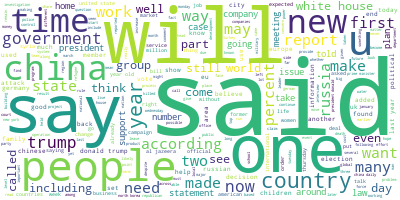

In [8]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(articles['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [9]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data = articles.text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashish/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['michigan', 'billionaire', 'education', 'activist', 'betsy', 'devos', 'confirmed', 'today', 'serve', 'secretary', 'education', 'president', 'trump', 'administration', 'vice', 'president', 'mike', 'pence', 'cast', 'tie', 'breaking', 'vote', 'senate', 'senate', 'voted', 'devos', 'highly', 'contentious', 'nomination', 'afternoon']


In [10]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [11]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.013*"said" + 0.005*"would" + 0.004*"trump" + 0.004*"new" + 0.004*"people" '
  '+ 0.004*"us" + 0.003*"government" + 0.003*"told" + 0.003*"chinese" + '
  '0.003*"two"'),
 (1,
  '0.009*"said" + 0.005*"would" + 0.005*"people" + 0.004*"trump" + 0.004*"one" '
  '+ 0.003*"also" + 0.003*"us" + 0.003*"new" + 0.003*"year" + '
  '0.003*"president"'),
 (2,
  '0.013*"said" + 0.007*"trump" + 0.006*"us" + 0.006*"one" + 0.005*"people" + '
  '0.004*"would" + 0.004*"president" + 0.004*"also" + 0.003*"government" + '
  '0.003*"two"'),
 (3,
  '0.011*"said" + 0.008*"trump" + 0.007*"us" + 0.006*"china" + 0.004*"also" + '
  '0.004*"president" + 0.004*"year" + 0.004*"would" + 0.004*"new" + '
  '0.003*"house"'),
 (4,
  '0.012*"said" + 0.006*"china" + 0.005*"us" + 0.004*"people" + 0.004*"also" + '
  '0.004*"year" + 0.003*"trump" + 0.003*"president" + 0.003*"says" + '
  '0.003*"first"'),
 (5,
  '0.013*"said" + 0.005*"also" + 0.004*"year" + 0.004*"new" + 0.003*"says" + '
  '0.003*"one" + 0.003*"us" + 0.

In [14]:

import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb+') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

/opt/anaconda3/envs/env-TM2020/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/envs/env-TM2020/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.001583 -0.013455       1        1  15.521621
4     -0.012273 -0.003529       2        1  14.577752
2      0.016906 -0.002729       3        1  14.296987
7      0.002283  0.000595       4        1  10.950913
3     -0.001799 -0.009168       5        1  10.542684
9      0.001864  0.003201       6        1   8.701961
5     -0.007055  0.011229       7        1   7.626016
0     -0.005131 -0.000222       8        1   6.763964
1      0.006566  0.005150       9        1   6.505626
8      0.000221  0.008929      10        1   4.512476, topic_info=         Term          Freq         Total Category  logprob  loglift
138      said  13947.000000  13947.000000  Default  30.0000  30.0000
164     trump   6105.000000   6105.000000  Default  29.0000  29.0000
184     would   4182.000000   4182.000000  Default  28.0000  28.0000
112       one   3978.000000   3978.000000  Default  27.0000  27.0000
3423    china   4030.000000   4030.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1121  russian     90.158462   2098.623072  Topic10  -6.3483  -0.0491
1120   russia     87.238928   2010.329488  Topic10  -6.3813  -0.0391
421     state     89.996572   2343.666524  Topic10  -6.3501  -0.1614
577    people    107.156616   4637.385199  Topic10  -6.1756  -0.6693
404      says     84.805102   3034.290608  Topic10  -6.4096  -0.4791

[877 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
0          1  0.130844        abc
0          2  0.101471        abc
0          3  0.144195        abc
0          4  0.144195        abc
0          5  0.072098        abc
...      ...       ...        ...
30068      6  0.055099  zealandia
30068      7  0.055099  zealandia
30068      8  0.275496  zealandia
39226      1  0.687589  zhainakov
44359      5  0.529882  zvonareva

[2809 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 3, 8, 4, 10, 6, 1, 2, 9])